# Machine Learning - Simple Linear Regression

##### Author: Jacob Sellinger

In this project we are seeking to do a simple machine learning problem using linear regression.

## Imports

We always first need to import our libraries, after having installed them to our machine using pip install.

In [2]:
import jupyterlab as jpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns

## Part 1 - Chart a Straight Line

Our first task is to plot a straight line of celsius against fahrenheit. With Fahrenheit on the x-axis and celsius on the y-axis



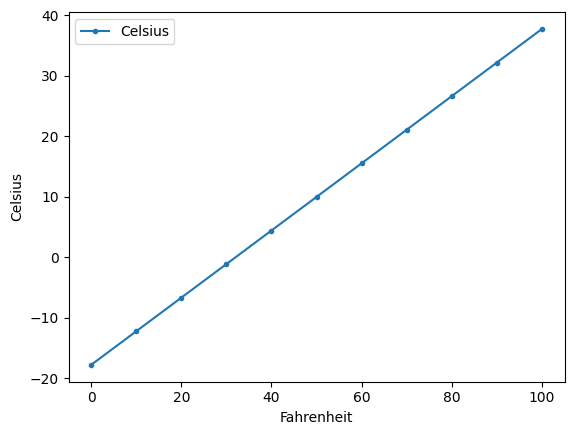

In [3]:
c = lambda f: 5/9 * (f-32)
temps = [(f,c(f)) for f in range(0,101,10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit',y='Celsius',style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

The next task is to predict the average high temperature in New York city in January. There will be several steps to this as we need to explore the data somewhat before we get into it.

### Section 1 - Data Acquisition

We need to load the csv file for the temperatures into a dataframe to work with it.

In [4]:
nyc_df = pd.read_csv("ave_hi_nyc_jan_1895-2018.csv")

### Section 2 - Data Inspection

Next we want to examine the head and the tail of the dataframe.

In [5]:
"This will bring up the head of the data frame (i.e. the beginning)"
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [6]:
"This will bring up the tail of the data frame (i.e. the end)"
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Section 3 - Data Cleaning

We need to clean this data a bit by improving the colum names to make them more descriptive and clean the date series

In [8]:
"This brings up the stated columns in the data frame then displays the head"

nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [9]:
"Need to clean up the date series by dividing by 100 and floor to produce just the year"

nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


## Section 4 - Descriptive Statistics

Now that we have cleaned the data slightly we will now get a general understanding of outliers and basic statistics of the data

In [10]:
"Taking the data frame - setting the values to two decimals places"

pd.set_option('display.precision', 2)

"Using the describe function to get teh basic statistics"

nyc_df.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


## Section 5 - Build the Model

After the basic description we can start building the linear regression model. We will use scipy and linregress to find the lienar regression function for our model and plot it. As well as adjust a few paramters.

In [ ]:
"This will calculate the linear regression variables - in this case we are retrieving the slope"

linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

"Retrieving the slope from the linear regression stats"

print(linear_regression.slope)

0.014771361132966163


In [12]:
"Retrieving the y-intercept"
print(linear_regression.intercept)

8.694993233674289


## Section 6 - Predict

Now we can use this linear regression model to predict the average high temperature in New York City for a given year. In our case we want to predict it for 2024.

In [13]:
"The below is simply inputting the variables found earlier into the equation"
# y = mx + b

print(linear_regression.slope * 2024 + linear_regression.intercept)

38.5922281667978


## Section 7 - Visualization

Now that we have the preduiction we may want to actually see how well it fits into our data. This means we will need to plot a graph with bopth the line and the points.

(10.0, 70.0)

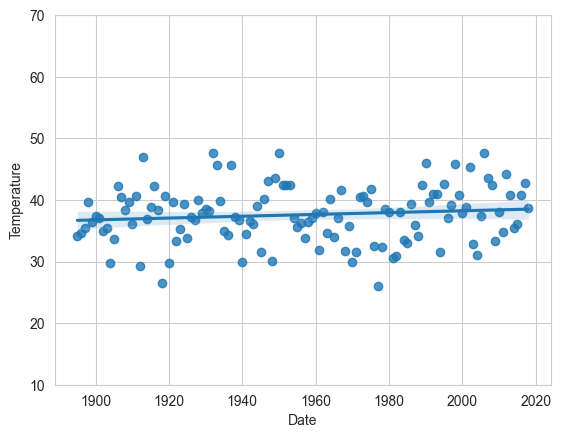

In [14]:
"Using seaborn to plot on a white grid"

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

# Part 3 - Prediction

We can now use our model to try and predict the average high temperature in New York - to do this we will want to train our algorithm to find the optimal line of fit.

In [15]:
"Training on the data set"

X_train, X_test, Y_train, Y_test = train_test_split(nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values, random_state=11)
X_train.shape

(93, 1)

In [16]:
X_test.shape

(31, 1)

In [17]:
# Training the model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train,y=Y_train)

LinearRegression()

In [18]:
"Prints the slope and intercept that the algorithm has found to be optimal"

print(f"Slope: {linear_regression.coef_}")
print(f"Intercept: {linear_regression.intercept_}")

Slope: [0.01939167]
Intercept: -0.30779820252656975


## Section 2 - Test the Model

Next we will test the model by comparing it to known points.

In [19]:
predict = linear_regression.predict(X_test)
expected = Y_test

for p, e in zip(predict[::5], expected[::5]):
    print(f"Predicted {p: .2f}, Expected: {e: .2f}")

Predicted  37.86, Expected:  31.70
Predicted  38.69, Expected:  34.80
Predicted  37.00, Expected:  39.40
Predicted  37.25, Expected:  45.70
Predicted  38.05, Expected:  32.30
Predicted  37.64, Expected:  33.80
Predicted  36.94, Expected:  39.70


In [20]:
"This expands the amount of test data"

predict = linear_regression.predict(nyc_df.Date.values.reshape(-1, 1))
expected = nyc_df.Temperature.values

for p, e in zip(predict[::5], expected[::5]):
    print(f"Predicted {p: .2f}, Expected: {e: .2f}")

Predicted  36.44, Expected:  34.20
Predicted  36.54, Expected:  37.40
Predicted  36.63, Expected:  33.70
Predicted  36.73, Expected:  36.10
Predicted  36.83, Expected:  38.90
Predicted  36.92, Expected:  29.70
Predicted  37.02, Expected:  33.80
Predicted  37.12, Expected:  38.50
Predicted  37.22, Expected:  35.00
Predicted  37.31, Expected:  30.00
Predicted  37.41, Expected:  31.50
Predicted  37.51, Expected:  47.60
Predicted  37.60, Expected:  35.60
Predicted  37.70, Expected:  37.80
Predicted  37.80, Expected:  34.00
Predicted  37.89, Expected:  29.90
Predicted  37.99, Expected:  41.70
Predicted  38.09, Expected:  38.00
Predicted  38.18, Expected:  33.00
Predicted  38.28, Expected:  46.00
Predicted  38.38, Expected:  42.60
Predicted  38.48, Expected:  37.80
Predicted  38.57, Expected:  37.40
Predicted  38.67, Expected:  38.10
Predicted  38.77, Expected:  36.10


## Section 3 - predict

We will now use our ML model to predict the temperature in 2024

In [21]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

# Predicting the temperature for year 2024
print(f"Avg high for 2024: {predict(2024)}*F")

Avg high for 2024: [38.94094855]*F


## Section 4 - Visualizations

We can now visualize our ML model

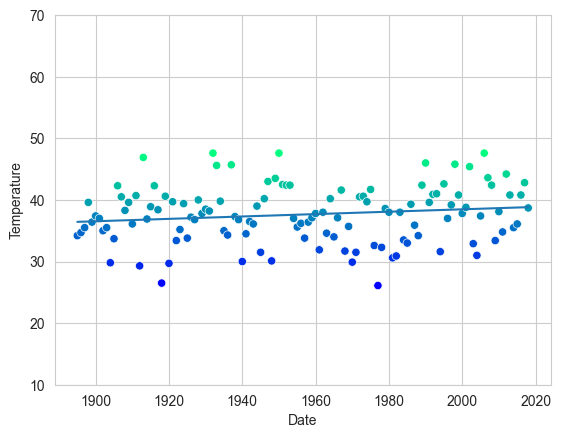

In [22]:
# Scatter plot
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

# Trendline
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

# Part 4 - Insights

We have now performed two separate ways of finding a linear regression model for a set of data both used for the same task of prediction. unsurprisingly we find that the linear regression function performed better at leasst when it comes to the R-squared value which tells us which line fits best.

In [41]:
"This is for the function r-squared"
nyc_df = pd.read_csv("ave_hi_nyc_jan_1895-2018.csv")
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
print(linear_regression)
print("R-squared:", linear_regression.rvalue**2)


LinregressResult(slope=np.float64(0.00014771361132966167), intercept=np.float64(8.694845520062952), rvalue=np.float64(0.11693766700752921), pvalue=np.float64(0.19586679787456207), stderr=np.float64(0.00011357855112603289), intercept_stderr=np.float64(22.225475726342946))
R-squared: 0.013674417965163785


In [42]:
"This is for the model"
from sklearn.metrics import r2_score

linear_regression = LinearRegression()
linear_regression.fit(X=X_train,y=Y_train)

nyc_df.Date = nyc_df.Date.floordiv(100)

predict = linear_regression.predict(nyc_df.Date.values.reshape(-1, 1))
expected = nyc_df.Temperature.values

r_squared = r2_score(expected, predict)
print("R-squared:", r_squared)

R-squared: 0.012270139578407724
